In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd

In [27]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [21]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [19]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

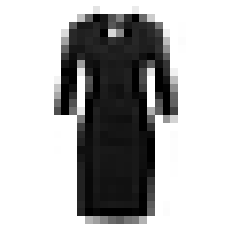

In [26]:
plt.imshow(X_train[69], cmap='binary', interpolation="nearest")
plt.axis('off')
plt.show()

In [28]:
X_train[1].shape

(28, 28)

In [32]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [48]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
    

In [49]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_4 (Flatten)         (None, 21632)             0         
                                                                 
 dense_13 (Dense)            (None, 100)               2163300   
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 2,164,630
Trainable params: 2,164,630
Non-trainable params: 0
_________________________________________________________________


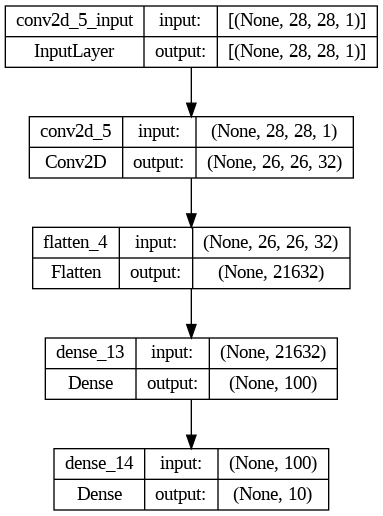

In [50]:
keras.utils.plot_model(model, "fashion_mnist_model.png", show_shapes=True)

In [51]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

In [52]:
checkpoint = keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint])

Epoch 1/10
1719/1719 [==============================] - 71s 41ms/step - loss: 0.6588 - accuracy: 0.7706 - val_loss: 0.5225 - val_accuracy: 0.8168
Epoch 2/10
1719/1719 [==============================] - 64s 37ms/step - loss: 0.4616 - accuracy: 0.8341 - val_loss: 0.4057 - val_accuracy: 0.8580
Epoch 3/10
1719/1719 [==============================] - 60s 35ms/step - loss: 0.4132 - accuracy: 0.8519 - val_loss: 0.5857 - val_accuracy: 0.7848
Epoch 4/10
1719/1719 [==============================] - 58s 34ms/step - loss: 0.3848 - accuracy: 0.8640 - val_loss: 0.3627 - val_accuracy: 0.8748
Epoch 5/10
1719/1719 [==============================] - 59s 34ms/step - loss: 0.3623 - accuracy: 0.8701 - val_loss: 0.3504 - val_accuracy: 0.8724
Epoch 6/10
1719/1719 [==============================] - 58s 34ms/step - loss: 0.3402 - accuracy: 0.8779 - val_loss: 0.3418 - val_accuracy: 0.8828
Epoch 7/10
1719/1719 [==============================] - 60s 35ms/step - loss: 0.3244 - accuracy: 0.8837 - val_loss: 0.3371 -

In [54]:
model = keras.models.load_model('my_model.h5')
model.evaluate(X_test ,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.3295 - accuracy: 0.8808


[0.32949188351631165, 0.8808000087738037]